# Table of Content: <a class="anchor" id="table-of-content"></a>
* [1. Problem Background and Motivation](#problem-background)
* [2. Libraries and Custom Functions](#import-packages)
* [3. Data Exploration/Prep](#data-prep)
* [4. Machine Learning Model](#ml-model)
* [5. Deployment of Model](#model-deployment)

# 1. Problem Background and Motivation <a class="anchor" id="problem-background"></a>

<img src='https://wiseloan.com/wp-content/uploads/2022/05/approved-loan-application.jpg' width="700" />

>**What is the problem we are trying to solve?**<br>
>Loan Approval process is a time taking and tedious mechanism which requires customer's attributes to make a decision on customer's credit worthiness.Usually, for an Unsecured loan, it takes about 3 hours - 1 day to process a loan.To provide better service, we intend to reduce the processing time.<br>
>Here, we are trying to build a model that provides a quick solution to the tedious loan approval process. Using the given data frame, we will predict the decision on future loans resulting in faster processing time.<br>
>This automation will significantly reduce the processing time from 3 hours-1 day to 30 seconds-3 minutes.<br>

>**Brief mention of key stakeholders - who would be interested in this analysis?**<br>
>1. Lenders - Currently there are designated teams to work on individual loans working on the approval process. Depending on the loan type, any loan approval process takes about 3 hours - 3 days to provide a decision on the loan application. With this automated mechanism, it saves time and cost for the lending company to prepare a decision on any loan.<br>
    - Within the organisation, this analysis is of importance to Business teams and Risk teams. We will look into the details going further.<br>
>2. Customers - In times of need, customers will end up saving processing time for their loans. They will end up getting funds faster than in the usual process.<br>

* [Go to Top](#table-of-content)

>-Prior to the analysis, I will highlight an important point here.<br>

>**For Lending, we see at Customer's attributes which comprises Character, Capacity and Capital.**<br>

<img src='https://image1.slideserve.com/1658592/three-c-s-of-credit-l.jpg' width="700" />

<br>

>I will classify the given predictor variables into these 3 categories for better understanding:<br>

>1. Character<br>
    -Gender<br>
    -Age<br>
    -Marital Status<br>
    -Existing Bank Customer<br>
    -Employment Industry<br>
    -Prior Defaults<br>
    -Credit Score<br>
    -Citizenship<br>
>2. Capacity<br>
    -Debt<br>
    -Income<br>
    -Work experience<br>
>3. Capital<br>
    -Debt<br>
    -Assets if any<br><br>
    
>Some of the predictors lie in both Capacity and Capital as they aren't mutually exclusive. Customer's capacity will also impact the capital.<br>    
    

# 2. Libraries & Custom Functions <a class="anchor" id="import-packages"></a>
* [Go to Top](#table-of-content)

In [417]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format
import numpy as np

# Graphics
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# ML
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn import metrics


# Custom function below is used to display performance measures
# Required inputs are the model name and the two test data objects (X,y)
def class_perf_measures(model,X_test,y_test):
    # Create empty lists to store metric values created within loop
    TP = []
    TN = []
    FP = []
    FN = []
    recall = []
    precision = []
    F1 = []
    Accuracy = []
    
    # Create list of probability threshold values to loop over
    threshold = np.arange(0,1.1,0.1).tolist()

    # Start loop
    for i in threshold:

        # Create class assignments given threshold value
        y_test_pred_class = (model.predict_proba(X_test)[:,1] >= i).astype(int)

        # Append lists with metric values
        TP.append(metrics.confusion_matrix(y_test, y_test_pred_class)[1,1])
        TN.append(metrics.confusion_matrix(y_test, y_test_pred_class)[0,0])
        FP.append(metrics.confusion_matrix(y_test, y_test_pred_class)[0,1])
        FN.append(metrics.confusion_matrix(y_test, y_test_pred_class)[1,0])
        recall.append(metrics.recall_score(y_test, y_test_pred_class).round(3))
        precision.append(metrics.precision_score(y_test, y_test_pred_class).round(3))
        F1.append(metrics.f1_score(y_test, y_test_pred_class).round(2))
        Accuracy.append(metrics.accuracy_score(y_test, y_test_pred_class).round(2))

    # Create dataframe
    result = pd.DataFrame({"threshold":threshold,
                           "TP":TP,
                           "TN":TN,
                           "FP":FP,
                           "FN":FN,
                           "Precision":precision,
                           "Recall":recall,
                           "F1":F1,
                           "Accuracy": Accuracy
                          })

    # Let's look at our dataframe
    return result

import pickle

# 3. Data Exploration/Prep <a class="anchor" id="data-prep"></a>
* [Go to Top of Notebook](#table-of-content)

- [ ] [Initial Evaluation](#initial-evaluation)
- [ ] [Initial Cleanup - dupes, missing values](#missing-values)
- [ ] [Outlier Detection & Treatment](#outliers)
- [ ] [Feature Selection](#feature-selection)
- [ ] [Data Partitioning](#data-split)
- [ ] [Data Normalization](#normalization)

> **Initial Evaluation** <a class="anchor" id="initial-evaluation"></a>

In [418]:
# Read in data 
df = pd.read_csv('loan_approval.csv')

df.tail()

,approved,gender,age,debt,married,bank_customer,emp_industrial,emp_materials,emp_consumer_services,emp_healthcare,emp_financials,emp_utilities,emp_education,ethnicity_white,ethnicity_black,ethnicity_latino,ethnicity_asian,ethnicity_other,years_employed,prior_default,employed,credit_score,drivers_license,citizen_bybirth,citizen_other,citizen_temporary,Income
685,0,1,21.08,10.09,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1.25,0,0,0,0,1,0,0,0
686,0,0,22.67,0.75,1,1,1,0,0,0,0,0,0,1,0,0,0,0,2.00,0,1,2,1,1,0,0,394
687,0,0,25.25,13.50,0,0,0,0,0,1,0,0,0,0,0,1,0,0,2.00,0,1,1,1,1,0,0,1
688,0,1,17.92,0.20,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0.04,0,0,0,0,1,0,0,750
689,0,1,35.00,3.38,1,1,1,0,0,0,0,0,0,0,1,0,0,0,8.29,0,0,0,1,1,0,0,0


> **Initial Evaluation: Notes on Findings**<br><br>
>**Observations:**<br>

>>690 records<br>
>>**Target:** approved (1 if customer is eligible for loan, 0 otherwise<br><br>
                        
>In the provided data set, ethnicity is one of the features to make the loan decision. However, I would like to drop this variable as race doesn't determine any of the 3C's of credit.<br>

>[Go to Data Prep Outline](#data-prep)
---

In [419]:
df.drop(['ethnicity_white','ethnicity_black','ethnicity_latino','ethnicity_asian','ethnicity_other'], axis=1, inplace=True)


> **Initial Cleanup - dupes, missing values** <a class="anchor" id="missing-values"></a>

>**Note:**<br>
The dataset is already clean, and not the scope of this assignment.

> **Initial Cleanup: Summary of Actions**<br><br>
No missing values or dupes

>[Go to Data Prep Outline](#data-prep)
---

> **Outlier Detection & Treatment** <a class="anchor" id="outliers"></a>

> **Note:**<br>
Skipping this part as mentioned above.

> **Outlier Detection: Notes/Summary of Actions**<br>
<br>
>**Note:**<br>
Skipping

>[Go to Data Prep Outline](#data-prep)
---

>**Feature Selection** <a class="anchor" id="feature-selection"></a>
<br>

>**To Do:**<br>
> 1. Include everything<br>


>[Go to Data Prep Outline](#data-prep)
---

> **Data Partitioning** <a class="anchor" id="data-split"></a>
<br>
>To Do:<br>
>1. Put all potential predictor variables into new object called 'X'
>2. Put target variable in new object called 'y'
>3. Partition data into training set and testing set<br>

>The data size is 690 which is a good amount of data, we will take Train-Test split of 70%-30%.


In [420]:
target = ['approved']

X = df.drop(target,axis=1)
y = df[target]

# Split data
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3,random_state=2)

>[Go to Data Prep Outline](#data-prep)
---

> **Data Normalization** <a class="anchor" id="normalization"></a>
<br><br>
>**Note:**<br>
>We do this AFTER splitting the data because we only want to use summary stats<br>
>from the TRAINING data to normalize BOTH TRAIN and TEST data<br>
<br><br>

In [421]:
# Normalize predictor variables using Z-Scores.
# Use means and standard deviations of features as calculated in the TRAINING DATA
# New values are centered at 0.  Values reflect the number of standard deviations
# each record is above or below the mean.

features_means = X_train.mean()
features_std = X_train.std()

X_train = (X_train - features_means)/features_std
X_test = (X_test - features_means)/features_std

>[Go to Data Prep Outline](#data-prep)
---

# 4. Machine Learning <a class="anchor" id="ml-model"></a>

>We have 2 types of classifiers to build our model for such classification problems. We will test both the models and choose the model that performs better on the train data.<br> 

- [X] [kNN](#first-model)
- [X] [Logistic Model](#second-model)
- [ ] [Performance Evaluation](#third-model)


* [Go to Top](#table-of-content)

> **kNN** <a class="anchor" id="first-model"></a>

>**Definition: For every new record, the target variable is assigned on the basis of majority class for 'k' records in the nearest vicinity to the new record.**<br>
<br>
>Instructions:<br>
>1. Fit numerous kNN models using different values for k. <br>
>2. Choose the "best" value for "k" based on Accuracy

>We usually take odd values for 'k' to avoid scenarios in case of a draw between the two classes.<br>

In [422]:
# 1. train a classifier for different values of k
results = []
for k in [1,3,5,7,9,11,13,15,17,19,21,23]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train.values.ravel())
    
    # Get predicted class
    y_pred_class = knn.predict(X_test)
    
    # Put Accuracy Score in results object
    results.append({'k':k,
                    'accuracy':metrics.accuracy_score(y_test,y_pred_class)
                   }
                  )
# Put results from above into a Pandas Dataframe
results_df = pd.DataFrame(results)
results_df


,k,accuracy
0,1,0.78
1,3,0.84
2,5,0.83
3,7,0.84
4,9,0.82
5,11,0.83
6,13,0.83
7,15,0.81
8,17,0.82
9,19,0.81


>**Decision:**<br>
>As explained earlier, 'k' is mostly chosen as an odd values to avoid draw between two classes of observation. From the above results, we choose k as 7 as this value has high accuracy value. Accuracy is same for k = 3, but I am choosing k = 7 as this gives a better probability threshold grid to analyse the model. Also, it gives a better accuracy for Train and test data set<br>

>**Re-run kNN using the value selected above:**<br>


In [423]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train.values.ravel())

# Let's do a quick check to see if we have to worry about problems of overfitting.
# Remember!  Small values for "k" in kNN tend to lead to overfitting.
# Large value for "k" in kNN tend to produce underfit models
y_train_pred_class = knn.predict(X_train)
y_test_pred_class = knn.predict(X_test)

print('Training data Accuracy:', metrics.accuracy_score(y_train,y_train_pred_class).round(2))
print('Testing data Accuracy:', metrics.accuracy_score(y_test,y_test_pred_class).round(2))


Training data Accuracy: 0.87
Testing data Accuracy: 0.84


>From the above accuracy result, the accuracy for train data is slightly better than for test data. We might conclude that there can be a case of overfitting.<br>



>For this final run of kNN, we will produce a table of performance measures across a range of probability threshold values.<br>

In [424]:
class_perf_measures(knn,X_test,y_test) 

,threshold,TP,TN,FP,FN,Precision,Recall,F1,Accuracy
0,0.00,102,0,105,0,0.49,1.00,0.66,0.49
1,0.10,100,43,62,2,0.62,0.98,0.76,0.69
2,0.20,91,78,27,11,0.77,0.89,0.83,0.82
3,0.30,84,91,14,18,0.86,0.82,0.84,0.85
4,0.40,84,91,14,18,0.86,0.82,0.84,0.85
5,0.50,78,95,10,24,0.89,0.77,0.82,0.84
6,0.60,68,98,7,34,0.91,0.67,0.77,0.80
7,0.70,68,98,7,34,0.91,0.67,0.77,0.80
8,0.80,54,103,2,48,0.96,0.53,0.68,0.76
9,0.90,32,104,1,70,0.97,0.31,0.47,0.66


>**Logistic Model:**<br>
>Let's produce the same table above but this time using a Logistic Model




In [425]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train.values.ravel())

# Let's do a quick check to see if we have to worry about problems of overfitting.
# Remember!  Small values for "k" in kNN tend to lead to overfitting.
# Large value for "k" in kNN tend to produce underfit models
y_train_pred_class = lr_model.predict(X_train)
y_test_pred_class = lr_model.predict(X_test)

print('Training data Accuracy:', metrics.accuracy_score(y_train,y_train_pred_class).round(2))
print('Testing data Accuracy:', metrics.accuracy_score(y_test,y_test_pred_class).round(2))

Training data Accuracy: 0.87
Testing data Accuracy: 0.89


>From the accuracy result for Logistic model, the accuracy for test data is better than Train data. This seems to be a better model than knn, however, we will look into this further with the AUC curve.

>For this final run of Logistic model, we will produce a table of performance measures across a range of probability threshold values.<br>

In [426]:

class_perf_measures(lr_model,X_test,y_test) 

/Users/nikitamodi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,threshold,TP,TN,FP,FN,Precision,Recall,F1,Accuracy
0,0.00,102,0,105,0,0.49,1.00,0.66,0.49
1,0.10,100,71,34,2,0.75,0.98,0.85,0.83
2,0.20,98,87,18,4,0.84,0.96,0.90,0.89
3,0.30,95,88,17,7,0.85,0.93,0.89,0.88
4,0.40,92,92,13,10,0.88,0.90,0.89,0.89
5,0.50,89,96,9,13,0.91,0.87,0.89,0.89
6,0.60,78,99,6,24,0.93,0.77,0.84,0.86
7,0.70,71,100,5,31,0.93,0.70,0.80,0.83
8,0.80,54,101,4,48,0.93,0.53,0.68,0.75
9,0.90,38,103,2,64,0.95,0.37,0.54,0.68


>**Winning Model:**<br>
We need to quickly decide which modeling framework to go forward with<br>
To keep this simple - I'm going to use AUC and will choose the model that gives us the highest value

/Users/nikitamodi/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


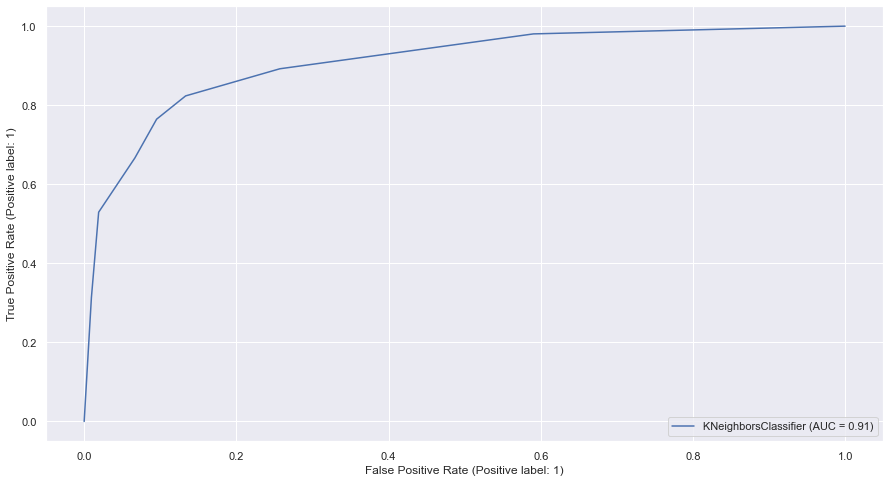

/Users/nikitamodi/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


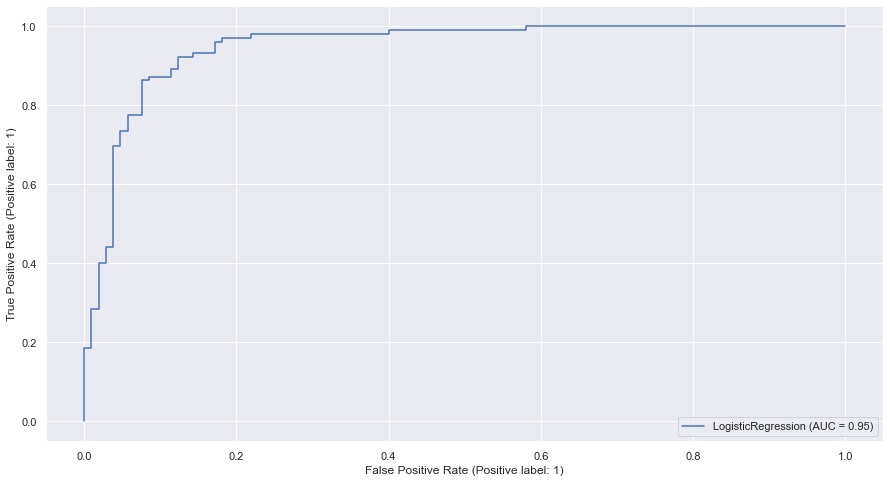

In [427]:
# ROC curve for kNN
metrics.plot_roc_curve(knn,X_test,y_test)
plt.show()

# ROC curve for Logistic Model
metrics.plot_roc_curve(lr_model,X_test,y_test)
plt.show()

In [428]:
y_score = knn.predict_proba(X_test)
k = metrics.roc_auc_score(y_test,y_score[:,1])
print("Area under the Curve for kNN model is",k)

y_score1 = lr_model.predict_proba(X_test)
lr = metrics.roc_auc_score(y_test,y_score1[:,1])
print("Area under the Curve for Logistic Regression model is",lr)

Area under the Curve for kNN model is 0.9084967320261439
Area under the Curve for Logistic Regression model is 0.9484593837535015


>**Decision Point:**<br>
AUC is highest for our Logistic Model so I will use that model to further evaluate probability thresholds and corresponding performance measures.<br>

>**Prior to assessing the Probability Threshold grid, I would like to state the business objective.**<br>
>There are 2 perspectives to a lending company to set an objective for loan approvals.Let me cover each of these one by one.<br>
>1. **Risk** : Risk department is one of the most important decision makers when it comes to loan approvals. They decide whether a specific type of customer should be eligible for a loan.<br>
            >- Knowing this, the Risk team would try to minimise losses,which is loan approval of customers who are likely to default on a loan. Thus, our objective will be to minimise the False positives, i.e., the loans which will not get approved in reality but our model predicts to approve these loans. From Risk perspective, we will try to maximise Precision thus minimising False positives.<br>
            >-Here, Risk doesn't care about False Negatives. These are the loans which will get approved in reality but model rejects these loans. However, this will immpact the business.<br>
>2. **Business** : Now, let's look at it from Business perspective. The business wants to maximise Revenue and thus profits by minimising losses. Along with Risk perspective, they want to minimise the False Negatives as rejecting potential good customers might result in direct business loss. Thus, the objective of the business will be to minimise both False Positive and False Negative. We will here focus on F1 to achieve business objective.<br>

In [429]:

class_perf_measures(lr_model,X_test,y_test) 

/Users/nikitamodi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,threshold,TP,TN,FP,FN,Precision,Recall,F1,Accuracy
0,0.00,102,0,105,0,0.49,1.00,0.66,0.49
1,0.10,100,71,34,2,0.75,0.98,0.85,0.83
2,0.20,98,87,18,4,0.84,0.96,0.90,0.89
3,0.30,95,88,17,7,0.85,0.93,0.89,0.88
4,0.40,92,92,13,10,0.88,0.90,0.89,0.89
5,0.50,89,96,9,13,0.91,0.87,0.89,0.89
6,0.60,78,99,6,24,0.93,0.77,0.84,0.86
7,0.70,71,100,5,31,0.93,0.70,0.80,0.83
8,0.80,54,101,4,48,0.93,0.53,0.68,0.75
9,0.90,38,103,2,64,0.95,0.37,0.54,0.68


**Assessing the Probability Threshold grid for Logistic Model below:**<br><br>

<img src='Screenshot 2022-10-18 at 5.13.50 PM.png' width="700" />

**TP(True Positive):** Loan is approved both in reality and by the model.<br>
**TN(True Negative):** Loan is rejected both in reality and by the model.<br>
**FP(False Positive):** Loan is rejected in reality but approved by the model.<br>
**FN(False Negative):** Loan is approved in reality but rejected by the model.<br>

1. **Prob Threshold = 0.0**:
    - relative low threshold required to predict positive outcomes. This results in all loans getting approved which is beneficial for the Business.
    - The low threshold results in a lot of false positives - 105 to be exact. These are the loans that weren't approved in reality. These customers are not eligible for loan and might default the loan. It will result in losses which both Business and Risk wants to minimise.
    - There are no False Negatives as we approve all the loans. We are approving all loans thus increasing business volume. No impact on cost here.
    - Precision here is low which is 49%, having high false Positives of 105. This states that the losses from these 105 FP customers will result in low net Profit.
    - Risk department will outrightly reject the model as there are high number of False Positives (the idea here is to minimise the losses).
    - Since precision is so low here despite the high recall, keeping in mind both the Business and Risk objective, we will not use this probability threshold as this will directly impact the lending company due to low net profit.
    - Above justification can be supported by low F1 score - 66%. We can try to achieve high F1 score in this model to keep the business profitable.
    - The model approves all the loans with threshold of 0, we will surely start a business but due to high percentage of ineligible customers, the business will not be long-lasting due to high losses.
<br><br>
2. **Prob Threshold = 0.5**:
    - Here, False Negatives are 13 which is obviously worse than the previous threshold. However, look at the False Positives! It has reduced significantly from 105 to 9 which is a great improvement.
    - With reduced False positives, we are rejecting probable defaulters fo rthe loan thus minimising loss to the business. 
    - With such low False Positives, precision has improved quite a lot (from 49% to 91%). This states that we approve lesser customers who were not eligible.
    - The cost of False Negative isn't too high as we are rejecting few customers who were actually eligible for the loan.
    - Since, we are trying to minimise both False Negatives and False positives, we will move ahead with this probability threshold.
<br><br>
3. **Prob Threshold = 0.9**:
    - This threshold will result in very low number of positives. This states that we will not allow customers to take a loan if they are not eligible.
    - From Risk perspective, this is the best Threshold to go ahead with as it will help us minimise the losses. Here, False Positive is 2,i.e., we have approved only 2 loans which was rejected in reality.
    - However, please have a look at the high number of negatives here. Of the total 207 customers, we have rejected 167 customers due to the high probability threshold.
    - False Negative is 64, we have rejected 64 potential customers. This reduces our revenue which directly impacts business.
    - Even though the losses have been minimised, the revenue has decreased too. For this reason,we will not go ahead with this probability threshold.
<br><br>
4. **We will choose Prob Threshold = 0.5 for below reasons:**
    - First we will look at the mistake that is costlier to the business - False Positives (approving ineligible customers)
    - False Negative is not as costly because it is okay to lose some potential customers, this will just result in lower revenue.
    - False Positive is costlier as approving ineligible customers will result in losses.
    - This threshold provides the least possible False Positives with a low False Negative.
    - We are giving importance to both these values as both are important however higher importance is given to False Positive.
    - This helps us keep losses in check while maximising the revenue.
    

>[Go to Machine Learning Outline](#ml-model)
---

# 5. Deployment of Model <a class="anchor" id="model-deployment"></a>

Optional - Extra Credit for this assignment

* [Go to Top](#table-of-content)